<a href="https://colab.research.google.com/github/isalesp/SBTi/blob/main/SBTi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Science-Based Targets initiative (SBTi)**

## **Executive Summary**

The Science-Based Targets initiative (SBTi) is a partnership between CDP, the United Nations Global Compact, World Resources Institute (WRI) and the World Wide Fund for Nature (WWF). 

Science-based targets show companies and financial institutions how much and how quickly businesses need to reduce their GHG emissions to prevent the worst impacts of climate change - leading them on a clear path towards decarbonization.

Targets are considered ‘science-based’ if they are in line with what the latest climate science deems necessary to meet the goals of the Paris Agreement – limiting global warming to well-below 2°C above pre-industrial levels and pursuing efforts to limit warming to 1.5°C.

As of march 29th, 2022, SBTi have registered 2,735 companies... 







## **Table of Contents**

1.   Environment
2.   Data
3.   Cleaning
4.   Exploratory Data Analysis (EDA)
5.   Conclusions






## **Environment**

Before we start our analysis, let's initiate our environment. For this case, We will be using pandas and numpy for analysis and matplotlib, geopandas and folium for visuals.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

!pip install geopandas
import folium
import geopandas as gpd

Now to import our data, let´s store the path to the .xlsx file that contains the data from SBTi into the variable url. For this analysis, the .xlsx file was preloaded on a Github repository to facilitate access to data.


In [ ]:
url = "https://raw.githubusercontent.com/isalesp/SBTi/main/companies.xlsx"

To being able to work with our data it is necessary to use the read_excel function from pandas and store it in new variable. This new variable named data will contain our data frame with all columns and rows from our .xlsx file.

In [ ]:
data = pd.read_excel(url)

## **Data**

Once we have loaded our data, let´s start by reviewing some general aspects. We use `shape` from pandas and identify that our dataset contains 2,735 rows and 22 columns.

In [ ]:
data.shape

(2735, 22)

To check how our dataset is organised and the data types that contains, we use `dtypes`. We see that some columns does not have the correct data type like Date which should be datatime64.

In [ ]:
data.dtypes

Unnamed: 0                           float64
Unnamed: 1                           float64
Company Name                          object
ISIN                                  object
Near term - Target Status             object
Near term - Target Classification     object
Near term - Target Year               object
Long term - Target Status             object
Long term - Target Classification     object
Long term - Target Year               object
Net-Zero Committed                    object
Net-Zero Year                         object
Organization Type                     object
BA1.5?                                object
BA1.5 Date                            object
Country                               object
Region                                object
Sector                                object
Date                                  object
Target                                object
Target Classification                 object
Extension                             object
dtype: obj

Now let´s use `head` and review the first row. We see that the first two columns does not contain information and other columns present missing values identified by the word Nan (Not A number). We will cover these details when we start cleaning our dataset.

In [ ]:
data.head(1)

,Unnamed: 0,Unnamed: 1,Company Name,ISIN,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,...,Organization Type,BA1.5?,BA1.5 Date,Country,Region,Sector,Date,Target,Target Classification,Extension
0,NaN,NaN,Studio XAG,NaN,Targets Set,Well-below 2°C,2030.0,NaN,NaN,NaN,...,Small or Medium Enterprise,No,NaN,Albania,Europe,Professional Services,01/01/2022,This target was approved using a streamlined t...,The targets covering greenhouse gas emissions ...,NaN


##**Cleaning**

As we identified before, we need to indicate the proper datatype for the column Date so we can work with this data.

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

Now let's drop the two first columns that does not contain information. 

In [ ]:
data = data.dropna(how='all', axis='columns')

Let's check if changes were made by printing again dtypes.

In [ ]:
data.dtypes

Company Name                                 object
ISIN                                         object
Near term - Target Status                    object
Near term - Target Classification            object
Near term - Target Year                      object
Long term - Target Status                    object
Long term - Target Classification            object
Long term - Target Year                      object
Net-Zero Committed                           object
Net-Zero Year                                object
Organization Type                            object
BA1.5?                                       object
BA1.5 Date                                   object
Country                                      object
Region                                       object
Sector                                       object
Date                                 datetime64[ns]
Target                                       object
Target Classification                        object
Extension   

We already know that some columns contain Nan values, although for this analysis we only be focusing on some columns, let's check how many Nan values are in each column and whether it is necessary to change it for data that suits our needs. We see that columns: Near term - Target Status, Near term - Target Classification, Net-Zero Committed, Organization Type,  Region, Sector and Date are complete so there is no need to modify them.


In [ ]:
data.isnull().sum()

Company Name                            0
ISIN                                 1643
Near term - Target Status               0
Near term - Target Classification    1478
Near term - Target Year              1505
Long term - Target Status            2728
Long term - Target Classification    2728
Long term - Target Year              2727
Net-Zero Committed                      0
Net-Zero Year                        2728
Organization Type                       0
BA1.5?                                  0
BA1.5 Date                           1368
Country                                 0
Region                                  0
Sector                                  0
Date                                    1
Target                               1479
Target Classification                1483
Extension                            2554
dtype: int64

To review data for consistency and avoid duplicates or variations produced for typos. Let's use a for loop to only review the columns that we are interested on. First, we creat a list with the names of the columns we need and then, use a for loop to iterate over this list to count the number of values in each column. As result we have all columns grouped by unique values and the count of each one. It will be necessary to update some values like Targets set, europe, north America and Pharmaceuticals, Biotechnology and Life Sciences.

In [ ]:
udc = ['Near term - Target Status', 'Near term - Target Classification','Net-Zero Committed','Organization Type', 'Region', 'Sector'] 

for col in data[udc]:
    print(col)
    print(data[col].value_counts())
    print('\n')


Near term - Target Status
Committed      1479
Targets Set    1247
Targets set       9
Name: Near term - Target Status, dtype: int64


Near term - Target Classification
1.5°C                   883
Well-below 2°C          279
2°C                      94
1.5°C/Well-below 2°C      1
Name: Near term - Target Classification, dtype: int64


Net-Zero Committed
No     1775
Yes     960
Name: Net-Zero Committed, dtype: int64


Organization Type
Company                       2271
Small or Medium Enterprise     323
Financial Institution          141
Name: Organization Type, dtype: int64


Region
Europe           1526
Asia              561
North America     455
Latin America      92
Oceania            75
Africa             24
europe              1
north America       1
Name: Region, dtype: int64


Sector
Professional Services                                                                                                       234
Food and Beverage Processing                                          

By using loc we locate in each column the data we want to update and modify the content to be consistent.

In [ ]:
data.loc[data["Near term - Target Status"]== "Targets set", "Near term - Target Status"] = "Targets Set"
data.loc[data["Region"]== "europe", "Region"] = "Europe"
data.loc[data["Region"]== "north America", "Region"] = "North America"
data.loc[data["Sector"]== "Pharmaceuticals, Biotechnology and Life Sciences", "Sector"] = "Pharmaceuticals, Biotechnology and Life"


## **Exploratory Data Analysis (EDA)**

###**Regions and Countries**

Once our data is clean we proceed to perform our exploratory analysis. We will start by organising the data to identify the number of companies that have set Science Based Targets by region. We use groupby from pandas and grouped our dataset by region and then count the number of companies for each region. We convert the series result to a dataframe using to_frame and renamed the new column as CompaniesRegion. To visualise the results we use a bar chart using plot from matplotlib.                        We can see that Europe is the region with the largest number of compaiies setting SBTs, followed by Asia and Nort America.

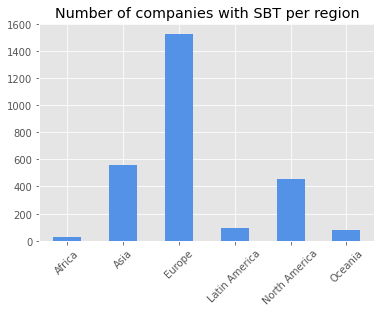

In [ ]:
tb1 = data.groupby(["Region"])["Company Name"].count()
tb1 = tb1.to_frame(name = "CompaniesRegion")
tb1
f1 = tb1.plot(kind = "bar", color = "#5492E8", legend=None)
plt.title("Number of companies with SBT per region")
plt.xlabel("")
plt.xticks(rotation= 45)
plt.show()

Now let's find out which are the top ten countries with the larger number of companies with SBTs. We use groupby to group by country and then, count the number of companies in each country, finally we sort the results in descending order and print only the first 10 results. As expected from the previous graph almost all contries are located in Europe.

In [ ]:
tb2 = data.groupby(["Country"])["Company Name"].count()
tb2 = tb2.to_frame(name = "Number of Companies").reset_index()
tb2.sort_values(by=["Number of Companies"], ascending= False).head(10)

,Country,Number of Companies
69,United Kingdom (UK),483
70,United States of America (USA),401
32,Japan,209
20,France,146
61,Sweden,143
21,Germany,138
44,Netherlands,78
16,Denmark,78
27,India,71
62,Switzerland,71


To have a top level view on how companies are distributed across the world, we will creat a choropleth map using folium and geopandas. First, using geopandas we read and store the geodataframe included in geopandas that contains all geographic information of each country in the world.


In [ ]:
world_geo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Before we can plot our data we must verify that the country names that we have can be matched with those in geopandas. So we merge both datasets on the country name and look for values that were not identified so we can update our information to match countries properly. We found that 11 contries were not identified on the geopandas file.

In [ ]:
nid = pd.merge(world_geo, tb2, left_on= "name", right_on = "Country", how="outer")
nid = nid[nid.geometry.isnull()]
nid

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Number of Companies
177,NaN,NaN,NaN,NaN,NaN,None,Bermuda,3.0
178,NaN,NaN,NaN,NaN,NaN,None,Czech Republic,2.0
179,NaN,NaN,NaN,NaN,NaN,None,Hong Kong,31.0
180,NaN,NaN,NaN,NaN,NaN,None,Jersey,1.0
181,NaN,NaN,NaN,NaN,NaN,None,Malta,1.0
182,NaN,NaN,NaN,NaN,NaN,None,Mauritius,3.0
183,NaN,NaN,NaN,NaN,NaN,None,Singapore,18.0
184,NaN,NaN,NaN,NaN,NaN,None,"Taiwan, Province of China",40.0
185,NaN,NaN,NaN,NaN,NaN,None,United Arab Emirates (UAE),8.0
186,NaN,NaN,NaN,NaN,NaN,None,United Kingdom (UK),483.0


From 11 contries that were not identified we can only replace 5.
The rest are not included in geopandas. Due to data limitation, a note will be provided on the graph.

In [ ]:
tb2_1 = tb2.replace({ "Country" : { 
    "Czech Republic":"Czechia",
    "Taiwan, Province of China": "Taiwan",
    "United Arab Emirates (UAE)": "United Arab Emirates",
    "United Kingdom (UK)": "United Kingdom",
    "United States of America (USA)": "United States of America"}})


Now we merge both datasets and eliminate those countries that does not have companies with SBTs.

In [ ]:
tb3 = world_geo.merge(tb2_1, left_on= "name", right_on = "Country", how="inner")
tb3 = tb3.dropna(subset = ["Number of Companies"])
   

We use folium to creat our map.

In [ ]:
world_map = folium.Map(location=[0, 0], zoom_start=1)
world_map.choropleth(
    geo_data= tb3,
    data= tb3,
    columns=["Country", "Number of Companies"],
    key_on="feature.properties.name",
    fill_color= "YlGnBu", 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name = "Number of companies with SBTs per country",
)

style_function = "font-size : 15px; fond-weight: bold"

world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


###**Registries**

incorporation over time... 

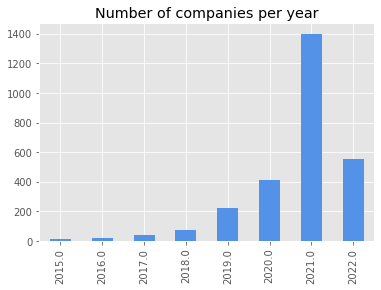

In [73]:
yrs = data.groupby(data['Date'].dt.year)["Company Name"].count()
bnbn= yrs.plot(kind = "bar", color = "#5492E8")
plt.title("Number of companies per year")
plt.xlabel("")
plt.show()

###**Target Status**

As we can see from charts above there is growing interest for companies across the world in setting targets. SBTi have already listed 2,735 companies, but is is necessary to diferentiate between those with already targets set and those that have shown intention by committing targets. Let's review their status. 

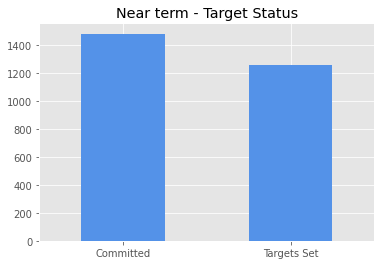

In [ ]:
tb5 = data.groupby(["Near term - Target Status"])["Company Name"].count()
f3 = tb5.plot(kind = "bar", color = "#5492E8")
plt.title("Near term - Target Status")
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()


### **Organization Type**

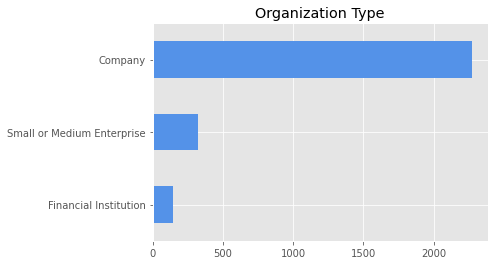

In [67]:
tb7 = data.groupby(["Organization Type"])["Company Name"].count().sort_values()

f5 = tb7.plot(kind = "barh", color = "#5492E8", legend=None)
plt.title("Organization Type")
plt.ylabel("")
plt.show()


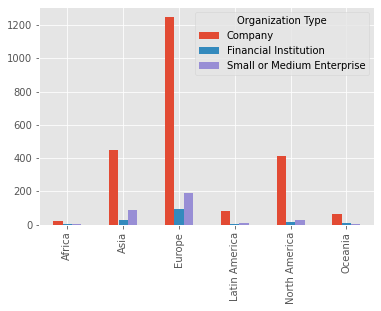

In [ ]:
pvt1 = pd.pivot_table(data, values='Company Name', index=['Region'],
                    columns=['Organization Type'], aggfunc= "count")

pvt1.plot(kind = "bar")
plt.xlabel("")
plt.show()

### **Sectors**

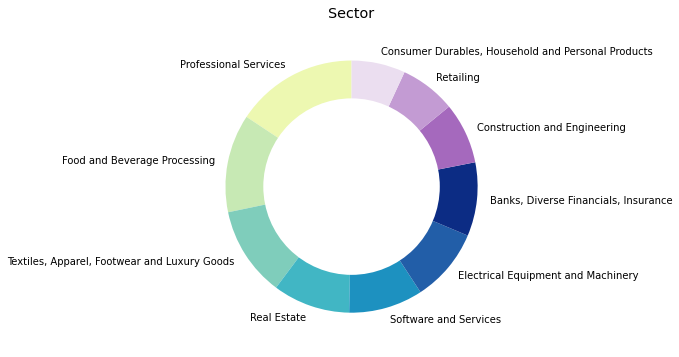

In [75]:
st = data.groupby(["Sector"])["Company Name"].count()
st = st.sort_values(ascending=False).head(10)

colors= ['#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0', '#225ea8',
         '#0c2c84', '#A569BD', '#C39BD3', '#EBDEF0']

st.plot(kind='pie',
        figsize=(5, 6), 
        startangle=90,     
        shadow=False,
        colors = colors,
        ylabel=''            
)

plt.title('Sector')
plt.axis('equal') 

center_circle_1 = plt.Circle((0,0), 0.70, fc = "white")
fig_1 = plt.gcf()
fig_1.gca().add_artist(center_circle_1)

plt.show()


In [ ]:
st1 = data.groupby(["Near term - Target Status","Sector"])["Company Name"].count()
st1= st1.reset_index(name = "Number")
st1= st1.sort_values(by=["Near term - Target Status","Number"],ascending=[False,False])
st1

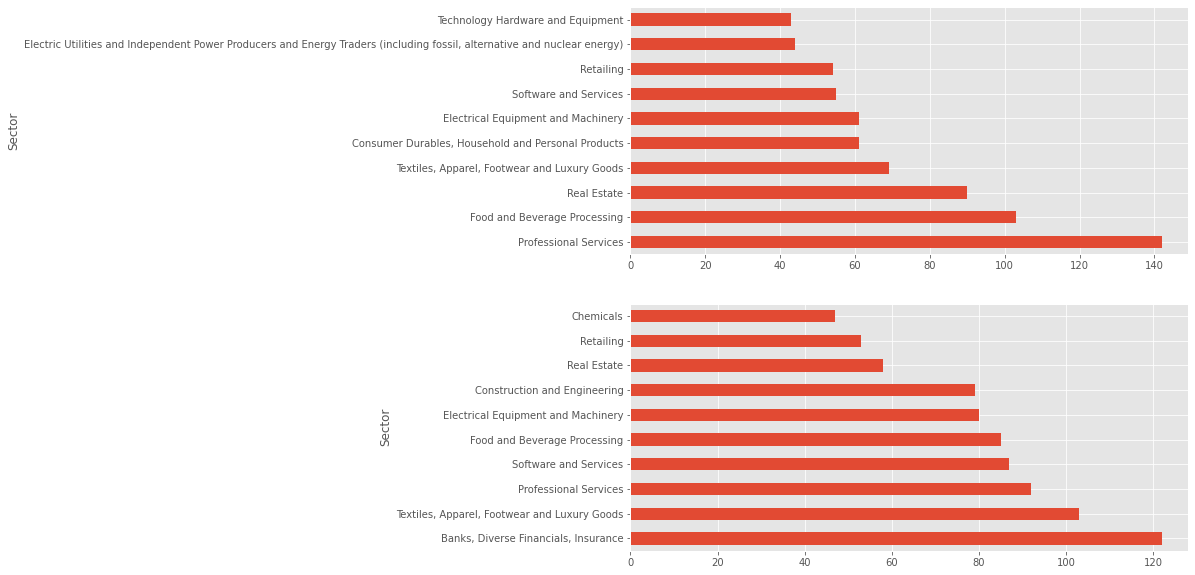

In [130]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10,10))


sett = st1.loc[st1["Near term - Target Status"] == "Targets Set"]
sett = sett.head(10)
sett.plot.barh(x ="Sector", y = "Number", ax = ax1, legend = None)

com = st1.loc[st1["Near term - Target Status"] == "Committed"]
com = com.head(10)
com.plot.barh(x ="Sector", y = "Number", ax = ax2, legend = None)

Text(0, 0.5, '')

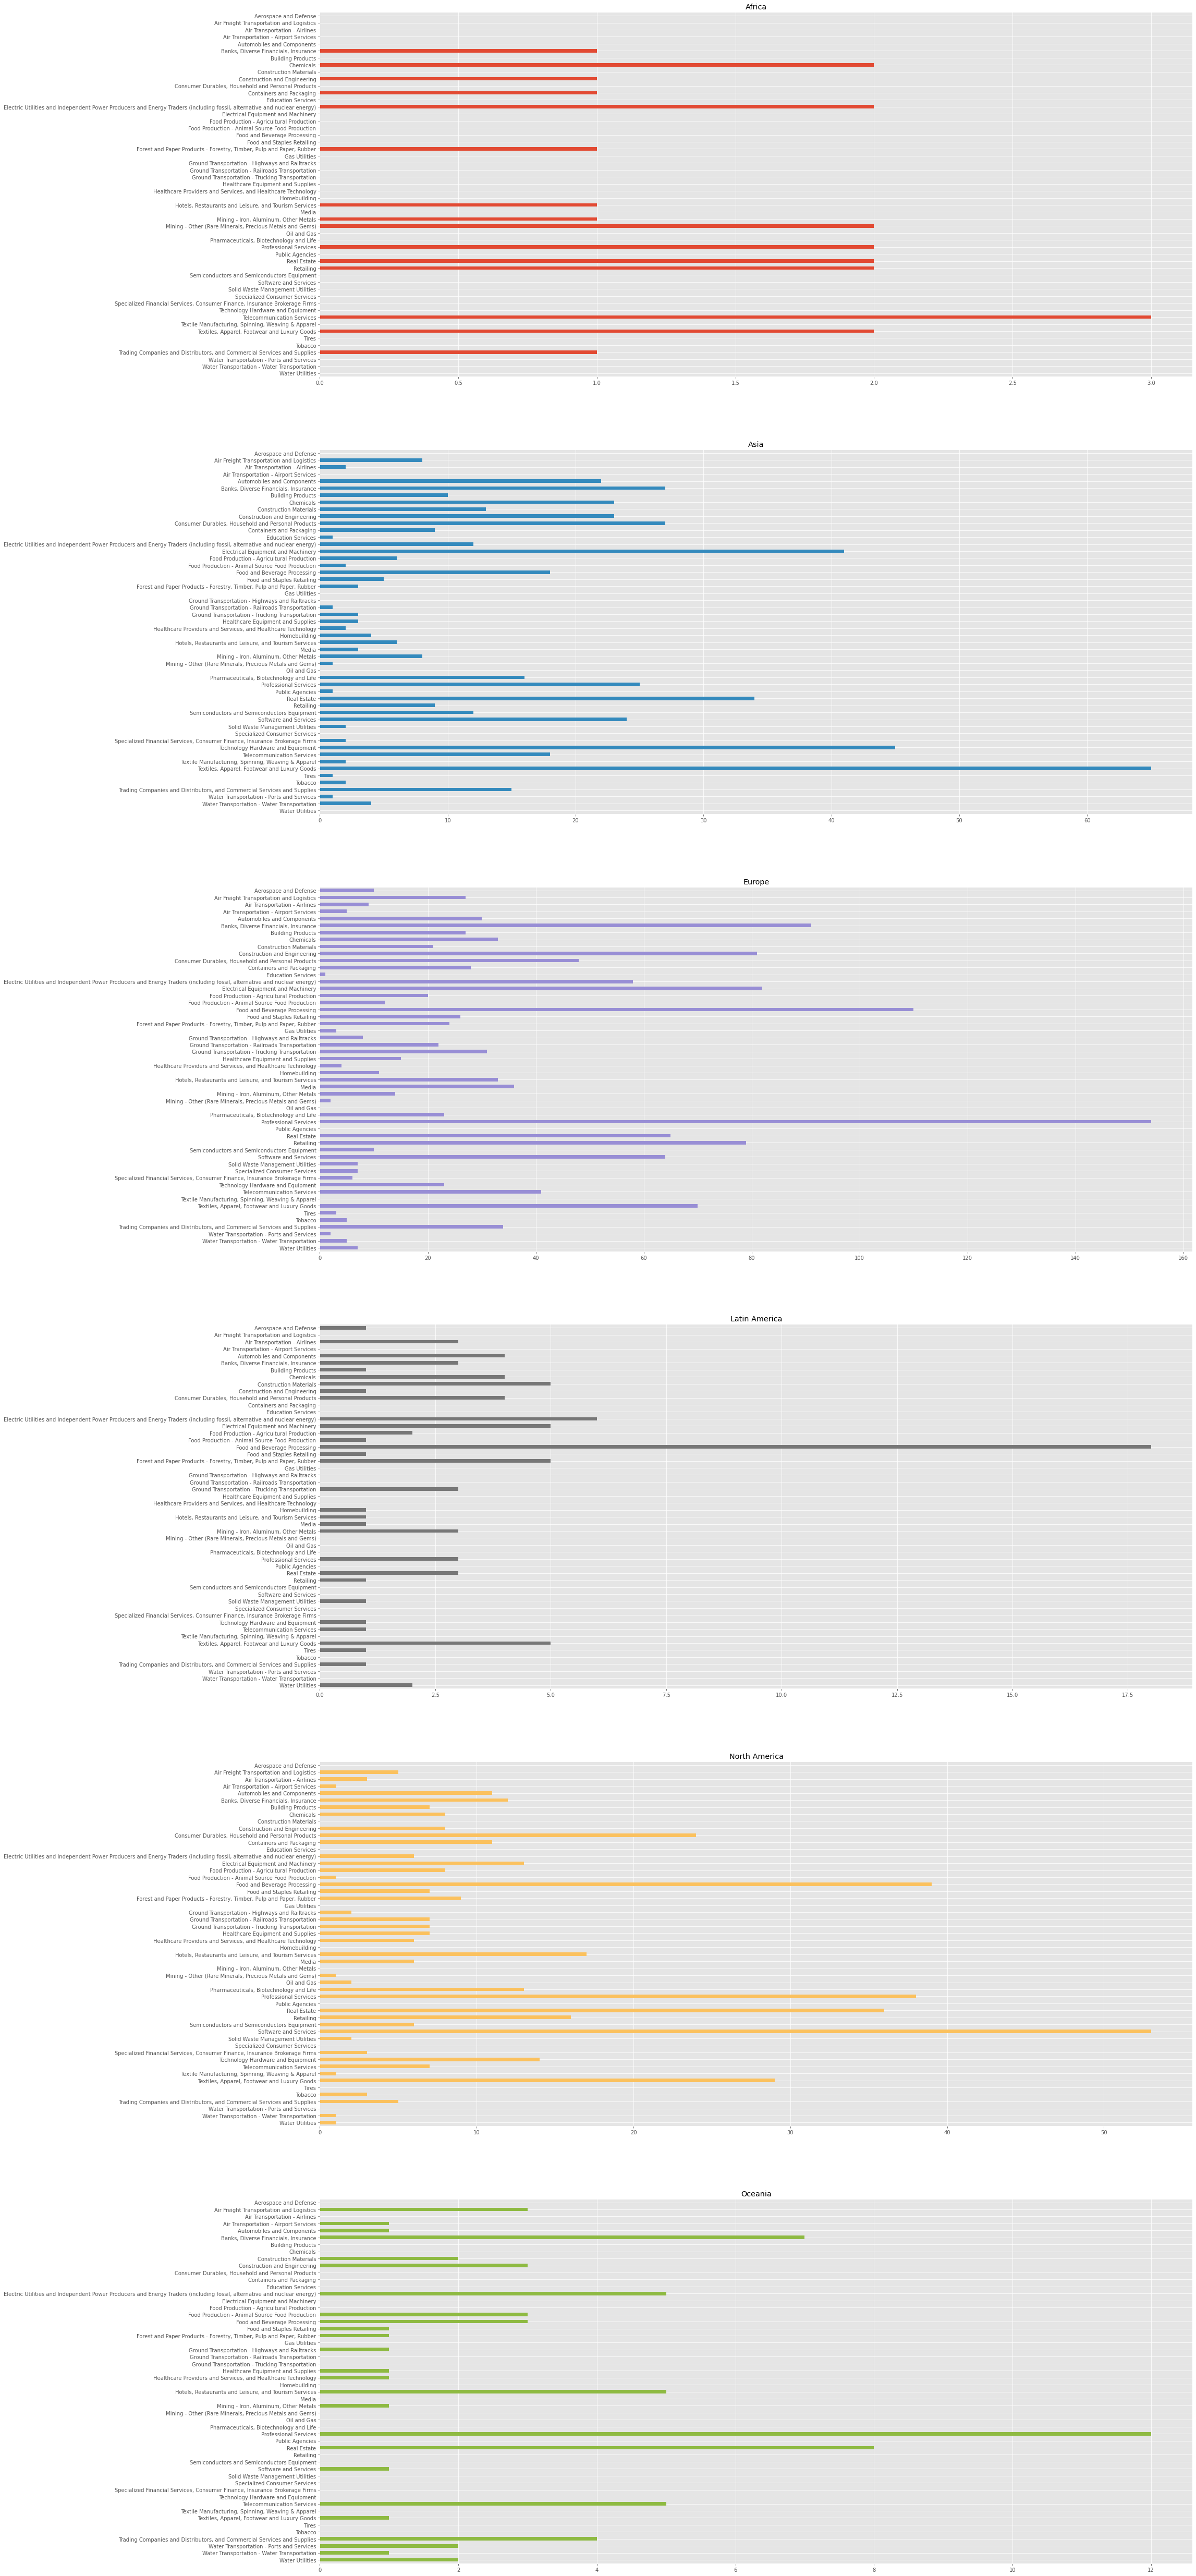

In [ ]:
pvt2 = pd.pivot_table(data, values="Company Name", index="Sector", columns= "Region", aggfunc= "count")
pvt2 = pvt2.fillna(0)

fig, axs = plt.subplots(6, 1, figsize=(30, 90))
pvt2.plot(kind ='barh', ax = axs, subplots=True, legend = None)

axs[0].invert_yaxis()
axs[0].set_ylabel('')

axs[1].invert_yaxis()
axs[1].set_ylabel('')

axs[2].invert_yaxis()
axs[2].set_ylabel('')

axs[3].invert_yaxis()
axs[3].set_ylabel('')

axs[4].invert_yaxis()
axs[4].set_ylabel('')

axs[5].invert_yaxis()
axs[5].set_ylabel('')


### **Net-Zero**

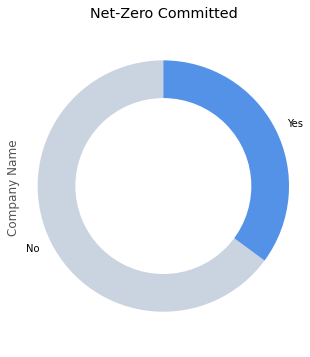

In [ ]:
tb6 = data.groupby(["Net-Zero Committed"])["Company Name"].count()

f4 = tb6.plot(kind='pie',
        figsize=(5, 6),
        colors = ("#CAD3E0", "#5492E8"),
        startangle=90,     
        shadow=False,             
        )

plt.title('Net-Zero Committed')
plt.axis('equal') 

center_circle = plt.Circle((0,0), 0.70, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

## **Conclusions**